In [ ]:
# netflix 데이터셋

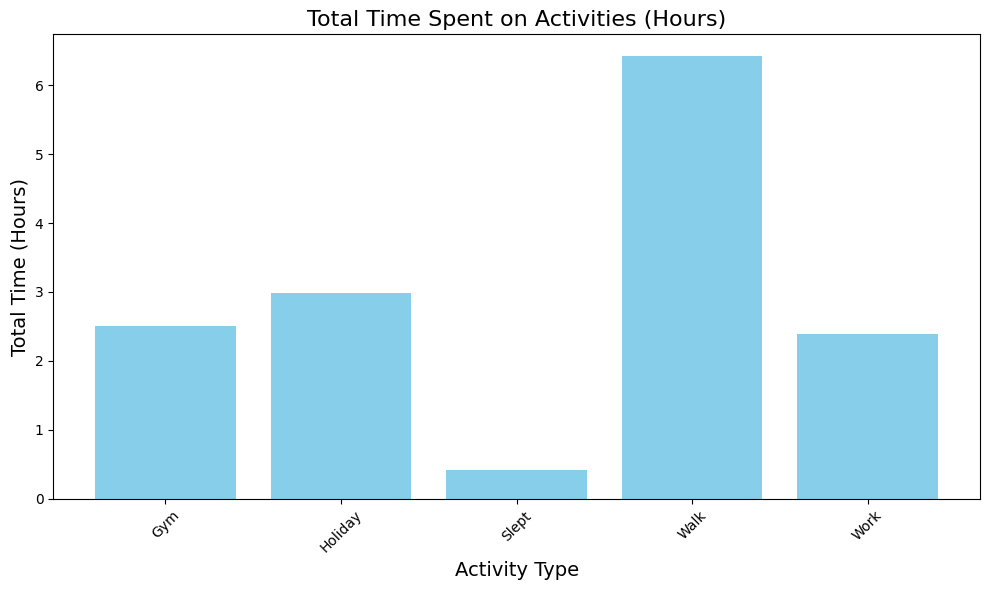

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta

# 데이터 입력
data = {
    "Date": [
        "31-01-2025", "01-02-2025", "02-02-2025", "03-02-2025", "04-02-2025",
        "05-02-2025", "06-02-2025", "06-02-2025", "07-02-2025", "07-02-2025",
        "08-02-2025", "09-02-2025", "10-02-2025", "11-02-2025", "11-02-2025",
        "12-02-2025", "13-02-2025"
    ],
    "Workout": [
        "Walk", "Walk", "Walk", "Work", "Slept",
        "Holiday", "Gym", "Walk", "Gym", "Walk",
        "Work", "Walk", "Work", "Gym", "Walk",
        "Walk", "Holiday"
    ],
    "Time": [
        "1:00:00", "1:00:00", "1:00:00", "0:30:00", "0:25:25",
        "2:00:00", "0:55:00", "0:45:00", "0:50:00", "0:20:00",
        "1:50:00", "0:45:00", "0:03:00", "0:45:00", "0:20:00",
        "1:15:00", "0:59:00"
    ]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 시간 데이터를 timedelta로 변환
df["Time"] = pd.to_timedelta(df["Time"])

# Workout별 시간 합계 계산
workout_summary = df.groupby("Workout")["Time"].sum()

# 초 단위로 변환 (그래프 표현을 위해)
workout_summary_seconds = workout_summary.dt.total_seconds()

# 막대그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(workout_summary.index, workout_summary_seconds / 3600, color="skyblue")
plt.title("Total Time Spent on Activities (Hours)", fontsize=16)
plt.xlabel("Activity Type", fontsize=14)
plt.ylabel("Total Time (Hours)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('netflix_titles.csv')

# 데이터 확인
print(df.head())  # 상위 5개 행 출력


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [ ]:
# $20

# 교보문고 패스트캠퍼

In [ ]:
list(df.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# 데이터 결측치 제거

In [ ]:
for column in df.columns:
  missing_ratio = df[column].isna().sum() / len(df) * 100
  if missing_ratio > 0:
    print(f"column [{column}] is na: {round(missing_ratio)}")

In [ ]:
import numpy as np

df['country'] = df['country'].fillna('No Data')
df['directory'] = df['director'].replace(np.nan, 'No Data')
df['cast'] = df['cast'].replace(np.nan, 'No Data')

In [ ]:
df['director'] = df['director'].fillna('No Data')

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
 12  directory     8790 non-null   object
dtypes: int64(1), object(12)
memory usage: 961.4+ KB


In [ ]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# 피처 엔지니어링
age_group_mapping = {
    'G': 'All',
    'TV-Y': 'All',
    'TV-G': 'All',
    'PG': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-Y7-FV': 'Older Kids',
    'TV-PG': 'Older Kids',
    'PG-13': 'Teens',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'NC-17': 'Adults',
    'TV-MA': 'Adults',
    'NR': 'Adults',
    None: None  # 결측치 처리
}

# 새로운 열 생성
df['age_group'] = df['rating'].map(age_group_mapping)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,directory,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,Teens
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",No Data,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq,Adults
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",No Data,Adults
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,No Data,Adults


In [ ]:
import pandas as pd
df.to_csv('netflix_preprocessed.csv', index=False)

In [ ]:
import pandas as pd

netflix = pd.read_csv('netflix_preprocessed.csv')


In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,directory,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,Teens
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",No Data,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq,Adults
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",No Data,Adults
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,No Data,Adults


<ipython-input-28-6e6ed6fb224c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_names, y=[1] * len(colors), palette=hex_values)


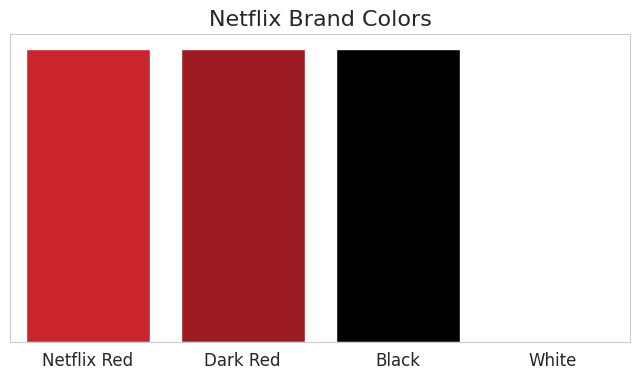

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 넷플릭스 주요 색상 정의
colors = {
    "Netflix Red": "#E50914",
    "Dark Red": "#B20710",
    "Black": "#000000",
    "White": "#FFFFFF"
}

# Seaborn 스타일 설정
sns.set_style("whitegrid")

# 색상 데이터 준비
color_names = list(colors.keys())
hex_values = list(colors.values())

# 막대그래프 생성
plt.figure(figsize=(8, 4))
sns.barplot(x=color_names, y=[1] * len(colors), palette=hex_values)

# 그래프 꾸미기
plt.title("Netflix Brand Colors", fontsize=16)
plt.ylabel("")
plt.xticks(fontsize=12)
plt.yticks([])
plt.show()


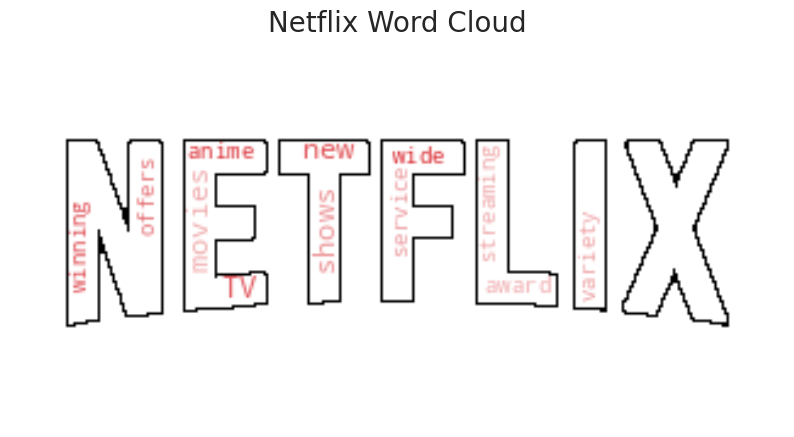

In [ ]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# 1. 텍스트 데이터 준비
text = """
Netflix is a streaming service that offers a wide variety of award-winning TV shows, movies, anime, documentaries, and more on thousands of internet-connected devices.
You can watch as much as you want, whenever you want, without a single commercial – all for one low monthly price.
There's always something new to discover, and new TV shows and movies are added every week!
"""

# 2. 불용어 설정 (제외할 단어)
stopwords = set(STOPWORDS)
stopwords.update(["Netflix", "watch", "want"])  # 제외할 단어 추가

# 3. 마스크 이미지 로드 및 RGB 변환
mask_image = Image.open("logo_image.png")  # 로고 이미지 경로
mask_image = mask_image.convert("RGB")  # Grayscale 이미지를 RGB로 변환
mask_array = np.array(mask_image)

# 4. 워드 클라우드 생성
wordcloud = WordCloud(
    background_color="white",       # 배경색
    stopwords=stopwords,            # 불용어
    mask=mask_array,                # 마스크 이미지 적용
    contour_width=1,                # 테두리 두께
    contour_color="black",          # 테두리 색상
    max_words=2000,                 # 최대 단어 수
    colormap="Reds"                 # 색상 팔레트 (넷플릭스 스타일)
).generate(text)

# 5. 마스크 이미지의 색상을 기반으로 컬러 적용
image_colors = ImageColorGenerator(mask_array)
wordcloud = wordcloud.recolor(color_func=image_colors)

# 6. 결과 시각화 및 저장
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # 축 제거
plt.title("Netflix Word Cloud", fontsize=20)
plt.show()

# 워드 클라우드를 파일로 저장
wordcloud.to_file("netflix_wordcloud.png")


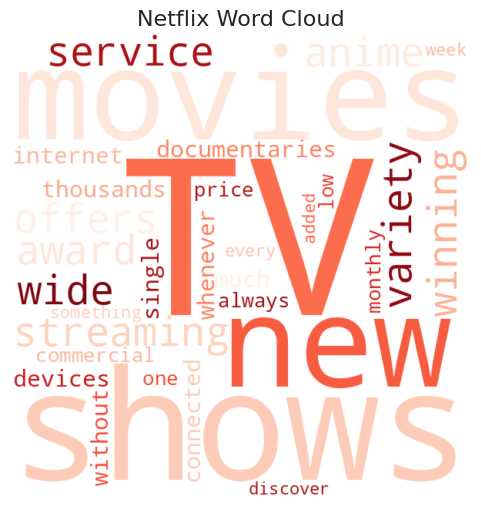

In [ ]:
# 이미지제외 워드클라우드

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 1. 텍스트 데이터 준비
text = """
Netflix is a streaming service that offers a wide variety of award-winning TV shows, movies, anime, documentaries, and more on thousands of internet-connected devices.
You can watch as much as you want, whenever you want, without a single commercial – all for one low monthly price.
There's always something new to discover, and new TV shows and movies are added every week!
"""

# 2. 불용어 설정 (제외할 단어)
stopwords = set(STOPWORDS)
stopwords.update(["Netflix", "watch", "want"])  # 제외할 단어 추가

# 3. 워드 클라우드 생성 (6x6 인치 크기 설정)
wordcloud = WordCloud(
    width=600,                  # 워드 클라우드의 폭 (픽셀 단위)
    height=600,                 # 워드 클라우드의 높이 (픽셀 단위)
    background_color="white",   # 배경색
    stopwords=stopwords,        # 불용어
    max_words=200,              # 최대 단어 수
    colormap="Reds"             # 색상 팔레트 (넷플릭스 스타일)
).generate(text)

# 4. 결과 시각화
plt.figure(figsize=(6, 6))      # Matplotlib에서 6x6인치 크기 설정
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")                 # 축 제거
plt.title("Netflix Word Cloud", fontsize=16)
plt.show()

# 5. 워드 클라우드를 파일로 저장
wordcloud.to_file("netflix_wordcloud_6x6.png")
